In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def txtify(x,vec,name):
    a = np.hstack([x[:,None], vec[:,None]])
    a = np.vstack([np.array(['x', 'y'])[None,:], a])
    np.savetxt('{}.txt'.format(name), a, fmt="%s")

# Trees

In [18]:
depths = list(range(3,11))
branching_factors = list(range(2,5))

results = np.zeros((len(depths), len(branching_factors), 4))

In [19]:
for d_idx, d in enumerate(depths):
    results[d_idx] = np.load('tree/tree_depth{}.npy'.format(d))

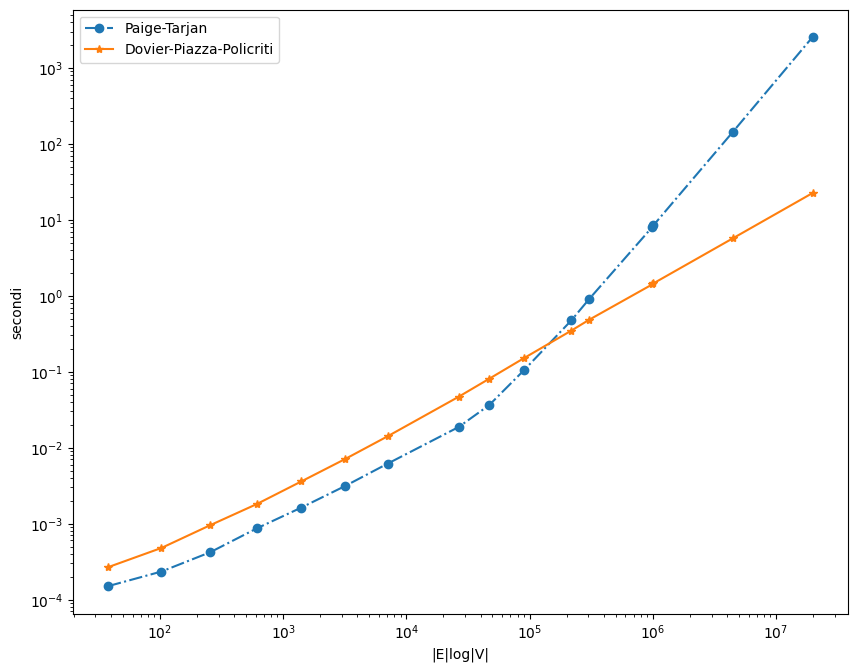

In [21]:
x = []
pta = []
fba = []

to_remove = [2,4,5,8,9,12,13,14]

for d_idx, d in enumerate(depths):
    for r_idx,r in enumerate(branching_factors):
        x.append(math.log(results[d_idx, r_idx, 2]) * results[d_idx, r_idx, 3])
        pta.append(results[d_idx, r_idx, 0])
        fba.append(results[d_idx, r_idx, 1])
        
x, pta, fba = zip(*sorted(zip(x, pta, fba)))
x = np.delete(x, to_remove)
pta = np.delete(pta, to_remove)
fba = np.delete(fba, to_remove)
        
plt.figure(figsize=(10,8), dpi=100)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.', marker='o')
plt.plot(x, fba, label='Dovier-Piazza-Policriti', marker='*')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

txtify(np.array(x), np.array(pta), 'tree/pta')
txtify(np.array(x), np.array(fba), 'tree/fba')

# Hopcroft

In [23]:
data = np.load('hopcroft/result_second_class.npy')
data.shape

(11, 4)

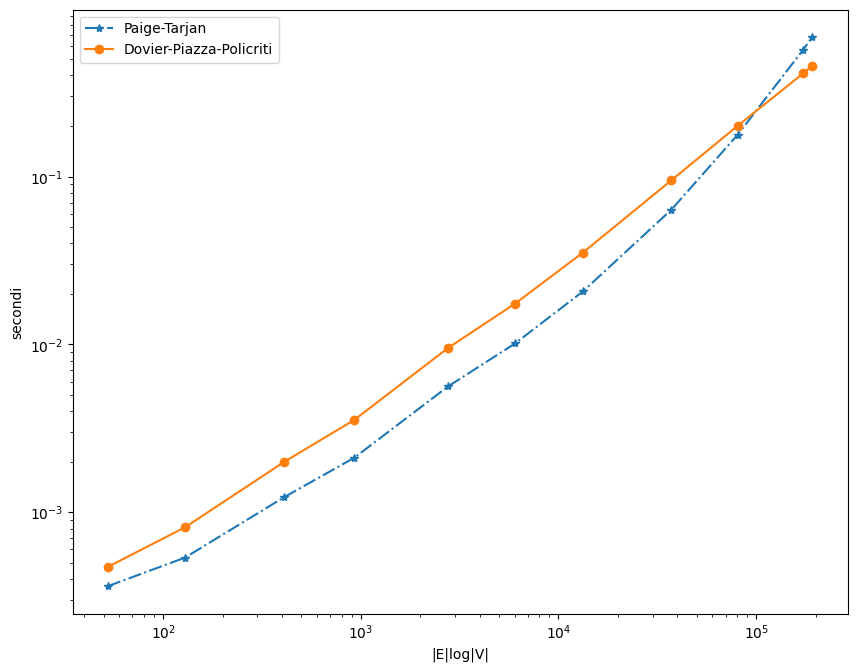

In [25]:
x = [math.log(vec[2]) * vec[3] for vec in data]
x, pta, fba = zip(*sorted(zip(x, data.T[0], data.T[1])))

plt.figure(figsize=(10,8), dpi=100)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.', marker='*')
plt.plot(x, fba, label='Dovier-Piazza-Policriti', marker='o')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

txtify(np.array(x), np.array(pta), 'hopcroft/pta')
txtify(np.array(x), np.array(fba), 'hopcroft/fba')

## Saha

In [6]:
%pwd

'/Users/francescoandreuzzi/Documents/Universita/Tesi/DocumentSource/experiments/time'

In [7]:
data = []

for n in [100,250,500,1000,1500,2000]:
    x = []
    for p in [1, 4]:
        if n == 2000 and p == 7:
            continue
        x.append(np.load('saha/random/data{}_{}.npy'.format(n,p)))
    data.append(x)
data = np.array(data)
print(data.shape)

x = np.array([100,250,500,1000,1500,2000])

for p in range(2):
    for alg in range(3):
        txtify(x, np.max(data, axis=2)[:,p,alg], 'saha/random/max_{}_{}'.format(p,alg))
        
for p in range(2):
    for alg in range(3):
        txtify(x, np.min(data, axis=2)[:,p,alg], 'saha/random/min_{}_{}'.format(p,alg))

for p in range(2):
    for alg in range(3):
        txtify(x, np.mean(data, axis=2)[:,p,alg], 'saha/random/mean_{}_{}'.format(p,alg))

(6, 2, 100, 3)


NameError: name 'txtify' is not defined

(6, 100, 5)


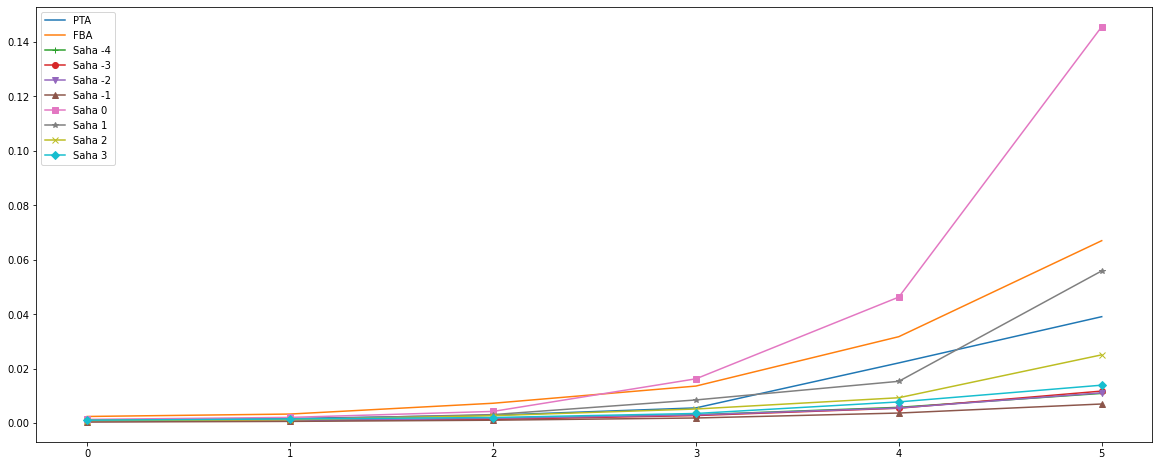

In [29]:
data = []

for b in [2]:
    x = []
    for d in range(5,11):
        x.append(np.load('saha/tree/npys/data{}_{}.npy'.format(b,d)))
    data.append(x)
data = np.array(data)[0]
print(data.shape)

x = np.array(list(range(5,11)))

edges = data[:,:,-2:]
edges = np.ceil(np.log2(edges + 1))
diff = edges[:,:,0] - edges[:,:,1]
m = int(np.min(diff))
M = int(np.max(diff))

data = data[:,:,:-2]

titles = ['PTA', 'FBA', 'Saha']
markers = ['+', 'o', 'v', '^', 's', '*', 'x', 'D']
m_idx = 0

plt.figure(figsize=(20,8))
for i,title in enumerate(titles):
    if i == 2:
        for j in range(m,M):
            if np.sum(diff == j) > 0:
                d = map(lambda v: np.mean(v,axis=0), filter(lambda v: len(v) > 0, 
                                                            [data[k,diff[k] == j] for k in range(6)]))
                d = np.array(list(d))
                if (len(d) != 6):
                    continue
                    
                name = lambda k: k if k > 0 else 'm{}'.format(k*-1)
                txtify(np.array(list(range(5,11))), d[:,2], 'saha/tree/second/data{}'.format(name(j)))
                    
                plt.plot(d[:,2], label='{} {}'.format(title,j), marker=markers[m_idx])
                m_idx+=1
    else:
        plt.plot(np.mean(data[:,:,i], axis=1), label=title)
        continue
plt.legend()
plt.show()

## Saha random scatter

In [44]:
p1 = np.load('saha/random/data2000_1.npy')
p2 = np.load('saha/random/data2000_4.npy')

print(np.mean(p1, axis=0))
print(np.mean(p2, axis=0))

x = np.array(list(range(100)))
for idx,p in enumerate([p1,p2]):
    for alg in range(3):
        txtify(x,p[:,alg],'saha/random/scatter_{}_{}'.format(idx,alg))

[0.02367323 0.05305607 0.01112568]
[0.06129174 0.07297469 0.03012856]


## Saha tree scatter

In [32]:
import string

data = np.load('saha/tree/npys/data2_10.npy')

edges = data[:,-2:]
edges = np.ceil(np.log2(edges + 1))
diff = edges[:,0] - edges[:,1]
m = int(np.min(diff))
M = int(np.max(diff))

data = data[:,:-2]
data = data[np.argsort(diff)]

alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

alphabet_index = 0
diff_to_char = {}
for j in range(m,M):
    if np.sum(diff == j) > 0:
        diff_to_char[j] = alphabet_list[alphabet_index]
        alphabet_index += 1
        
x = np.array(list(range(100)))
for alg in range(3):
    txtify(x,data[:,alg],'saha/tree/scatter_{}'.format(alg))

In [6]:
p1 = np.load('saha/random/data5000_1.npy')

x = np.array(list(range(100)))
for alg in range(3):
    txtify(x,p1[:,alg],'saha/random/scatter_3_{}'.format(alg))